In [18]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def pullsqldata():
    """This function pulls the necessary columns and rows from the PostGRES DB into a Pandas Dataframe in order 
    to continue with our EDA """
    
    engine = create_engine("postgresql:///kc_housing")
    query = """
                SELECT *
                FROM rpsale AS s
                INNER JOIN resbldg AS b ON CONCAT(s.Major,s.Minor) = CONCAT(b.Major, b.Minor)
                INNER JOIN parcel AS p ON CONCAT(s.Major,s.Minor) = CONCAT(p.Major,p.Minor)
                WHERE EXTRACT(YEAR FROM CAST(documentdate AS DATE)) = 2018
                    AND p.proptype = 'R'
                ;"""
    kc_df = pd.read_sql(sql = query, con = engine)
    return kc_df


In [4]:
df = pullsqldata()

In [22]:
df = df[(df['saleprice']>0) & (df['saleprice'] <  2*df['saleprice'].std())]
for name in df.columns:
    print(name)

excisetaxnbr
major
minor
documentdate
saleprice
recordingnbr
volume
page
platnbr
plattype
platlot
platblock
sellername
buyername
propertytype
principaluse
saleinstrument
afforestland
afcurrentuseland
afnonprofituse
afhistoricproperty
salereason
propertyclass
salewarning
major
minor
bldgnbr
nbrlivingunits
address
buildingnumber
fraction
directionprefix
streetname
streettype
directionsuffix
zipcode
stories
bldggrade
bldggradevar
sqft1stfloor
sqfthalffloor
sqft2ndfloor
sqftupperfloor
sqftunfinfull
sqftunfinhalf
sqfttotliving
sqfttotbasement
sqftfinbasement
finbasementgrade
sqftgaragebasement
sqftgarageattached
daylightbasement
sqftopenporch
sqftenclosedporch
sqftdeck
heatsystem
heatsource
brickstone
viewutilization
bedrooms
bathhalfcount
bath3qtrcount
bathfullcount
fpsinglestory
fpmultistory
fpfreestanding
fpadditional
yrbuilt
yrrenovated
pcntcomplete
obsolescence
pcntnetcondition
condition
addnlcost
major
minor
propname
platname
platlot
platblock
range
township
section
quartersection
pro

In [23]:
df1 = df[['saleprice', 'sqftlot']]
print(df1['saleprice'].std())
print(df1['saleprice'].mean())

316167.38890607195
669206.3812379525


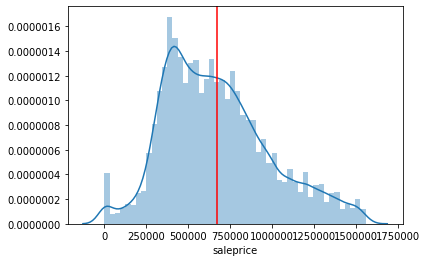

In [24]:
sns.distplot(df['saleprice'])
plt.axvline(df1['saleprice'].mean(), color = 'red');

In [ ]:
df_clean = df1[df1.saleprice <= ]